# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/christydain/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# news_api_key = os.getenv("NEWS_API_KEY")
load_dotenv()
api_key = os.getenv('NEWS_API_KEY')


Python-dotenv could not parse statement starting at line 8
Python-dotenv could not parse statement starting at line 10


In [3]:
# Create a newsapi client
from newsapi import NewsApiClient

# newsapi = NewsApiClient(api_key=news_api_key)

newsapi = NewsApiClient(api_key=api_key)



In [4]:
# Fetch the Bitcoin news articles

bitcoin_headlines = newsapi.get_everything(
    q="bitcoin AND BTC",
    language="en",
#    page_size=100
)


In [5]:
# Fetch the Ethereum news articles

Ethereum_headlines = newsapi.get_everything(
    q="ethereum AND ETH",
    language="en",
#    page_size=100
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        bitcoin_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(bitcoin_sentiments)


cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
btc_df = btc_df[cols]

btc_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.6908,0.000,0.831,0.169,"It's all about clean energy, it seems. \r\nElo..."
1,0.5574,0.000,0.893,0.107,"Several crypto fans that descended on Miami, F..."
2,0.1280,0.000,0.957,0.043,El Salvador has become the first country in th...
3,0.5859,0.000,0.866,0.134,By Reuters Staff\r\nJune 13 (Reuters) - Tesla ...
4,-0.5994,0.126,0.874,0.000,"Bitcoin hit a two-week peak just shy of $40,00..."


In [7]:
# Create the Ethereum sentiment scores DataFrame

Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        Ethereum_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
eth_df = eth_df[cols]

eth_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.3400,0.066,0.934,0.000,This article was translated from our Spanish e...
1,0.3612,0.000,0.935,0.065,"Sir Tim Berners-Lee, credited as the inventor ..."
2,0.0000,0.000,1.000,0.000,ENS stands for Ethereum Name Service and it is...
3,0.0000,0.000,1.000,0.000,"In February 2021, Figma CEO Dylan Fields sold ..."
4,0.1027,0.061,0.866,0.073,Opinions expressed by Entrepreneur contributor...


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.00000
mean,-0.045090,0.048600,0.911750,0.03965
std,0.417796,0.058344,0.055107,0.05261
min,-0.718400,0.000000,0.831000,0.00000
25%,-0.340000,0.000000,0.865500,0.00000
50%,0.000000,0.030500,0.920500,0.00000
75%,0.170000,0.066500,0.943000,0.06775
max,0.690800,0.162000,1.000000,0.16900


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.125790,0.032950,0.908400,0.058650
std,0.309371,0.050652,0.081225,0.056465
min,-0.440400,0.000000,0.775000,0.000000
25%,0.000000,0.000000,0.844750,0.000000
50%,0.051350,0.000000,0.931000,0.066000
75%,0.361200,0.065250,1.000000,0.080000
max,0.753100,0.151000,1.000000,0.211000


### Questions:

Q: Which coin had the highest mean positive score?

A: Eth

Q: Which coin had the highest compound score?

A: Eth

Q. Which coin had the highest positive score?

A: Eth

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords

def clean_text(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    output = [word.lower() for word in words if word.lower() not in sw]
    return output

# Expand the default stopwords list if necessary
addl_stopwords = [',', '', 'https', 'http', 'btc', 'bitcoin', 'eth', 'ethereum']


In [12]:
# Complete the tokenizer function

def tokenizer(text):
    """Tokenizes text."""

    # Create a list of the words
    words = word_tokenize(text)
    
    # Convert the words to lowercase
    words = [word.lower() for word in words]
 
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    words = [regex.sub('', word) for word in words]   
    
    # remove the stopwords
    sw = set(stopwords.words('english') + addl_stopwords)
    words = [word.lower() for word in words if word.lower() not in sw]
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]  
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc_tokens = []
[btc_tokens.append(tokenizer(text)) for text in list(btc_df.Text)]
btc_df['Tokens'] = btc_tokens
btc_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.6908,0.000,0.831,0.169,"It's all about clean energy, it seems. \r\nElo...","[clean, energy, seems, elon, musk, tesla, caus..."
1,0.5574,0.000,0.893,0.107,"Several crypto fans that descended on Miami, F...","[several, crypto, fan, descended, miami, flori..."
2,0.1280,0.000,0.957,0.043,El Salvador has become the first country in th...,"[el, salvador, become, first, country, world, ..."
3,0.5859,0.000,0.866,0.134,By Reuters Staff\r\nJune 13 (Reuters) - Tesla ...,"[reuters, staff, june, reuters, tesla, inc, el..."
4,-0.5994,0.126,0.874,0.000,"Bitcoin hit a two-week peak just shy of $40,00...","[hit, twoweek, peak, shy, monday, another, wee..."


In [14]:
# Create a new tokens column for Ethereum
eth_tokens = []
[eth_tokens.append(tokenizer(text)) for text in eth_df.Text]   
eth_df['Tokens'] = eth_tokens
eth_df.head()


,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.3400,0.066,0.934,0.000,This article was translated from our Spanish e...,"[article, translated, spanish, edition, using,..."
1,0.3612,0.000,0.935,0.065,"Sir Tim Berners-Lee, credited as the inventor ...","[sir, tim, bernerslee, credited, inventor, wor..."
2,0.0000,0.000,1.000,0.000,ENS stands for Ethereum Name Service and it is...,"[en, stand, name, service, decentralized, doma..."
3,0.0000,0.000,1.000,0.000,"In February 2021, Figma CEO Dylan Fields sold ...","[february, figma, ceo, dylan, field, sold, pie..."
4,0.1027,0.061,0.866,0.073,Opinions expressed by Entrepreneur contributor...,"[opinion, expressed, entrepreneur, contributor..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
n = 2
grams = ngrams(tokenizer(btc_df.Text.str.cat()), n)
Counter(grams).most_common(20)

[(('char', 'article'), 5),
 (('article', 'translated'), 5),
 (('translated', 'spanish'), 5),
 (('spanish', 'edition'), 5),
 (('edition', 'using'), 5),
 (('using', 'ai'), 5),
 (('ai', 'technology'), 5),
 (('technology', 'error'), 5),
 (('error', 'may'), 5),
 (('may', 'exist'), 5),
 (('exist', 'due'), 5),
 (('due', 'process'), 5),
 (('elon', 'musk'), 4),
 (('el', 'salvador'), 4),
 (('first', 'country'), 3),
 (('china', 'central'), 3),
 (('central', 'bank'), 3),
 (('clean', 'energy'), 2),
 (('salvador', 'become'), 2),
 (('become', 'first'), 2)]

In [17]:
# Generate the Ethereum N-grams where N=2
n = 2
grams = ngrams(tokenizer(eth_df.Text.str.cat()), n)
Counter(grams).most_common(20)

[(('vitalik', 'buterin'), 2),
 (('service', 'provider'), 2),
 (('london', 'england'), 2),
 (('article', 'translated'), 1),
 (('translated', 'spanish'), 1),
 (('spanish', 'edition'), 1),
 (('edition', 'using'), 1),
 (('using', 'ai'), 1),
 (('ai', 'technology'), 1),
 (('technology', 'error'), 1),
 (('error', 'may'), 1),
 (('may', 'exist'), 1),
 (('exist', 'due'), 1),
 (('due', 'process'), 1),
 (('process', 'last'), 1),
 (('last', 'may'), 1),
 (('may', 'vitalik'), 1),
 (('buterin', 'became'), 1),
 (('became', 'youngest'), 1),
 (('youngest', 'billionaire'), 1)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
btc_top_10 = tokenizer(btc_df.Text.str.cat())
token_count(btc_top_10, 10)

[('char', 20),
 ('reuters', 6),
 ('using', 6),
 ('tesla', 5),
 ('article', 5),
 ('translated', 5),
 ('spanish', 5),
 ('edition', 5),
 ('ai', 5),
 ('technology', 5)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
eth_top_10 = tokenizer(eth_df.Text.str.cat())
token_count(eth_top_10, 10)

[('char', 20),
 ('nft', 5),
 ('service', 5),
 ('wallet', 4),
 ('ether', 4),
 ('december', 4),
 ('crypto', 4),
 ('may', 3),
 ('name', 3),
 ('decentralized', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]


In [22]:
# Generate the Bitcoin word cloud
def wordcloud(text, title = ""):
    df_cloud=WordCloud(width=500, colormap="RdYlBu").generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict={"fontsize":48, "fontweight":"bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

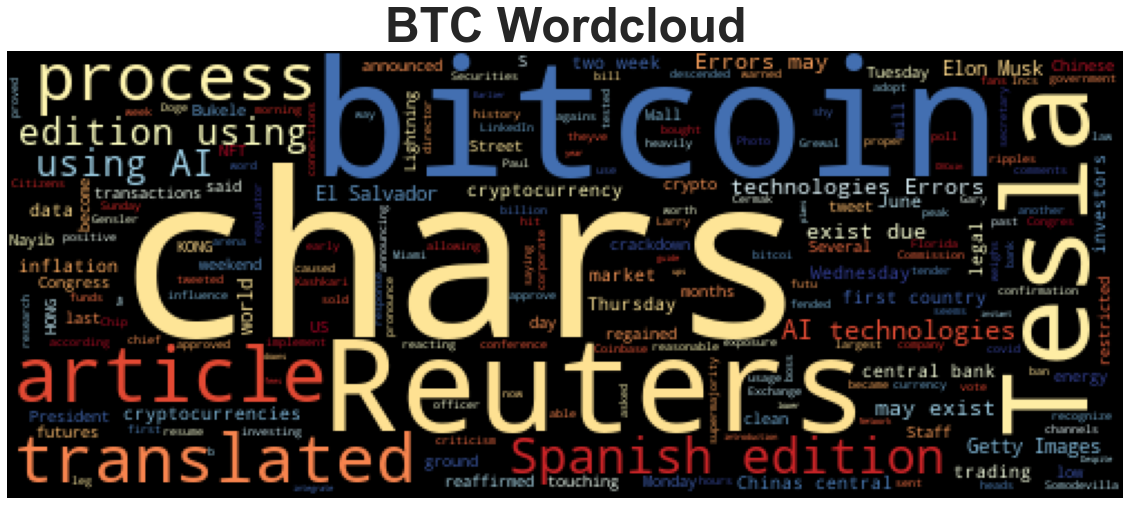

In [23]:
wordcloud(btc_df.Text.str.cat(), title="BTC Wordcloud")

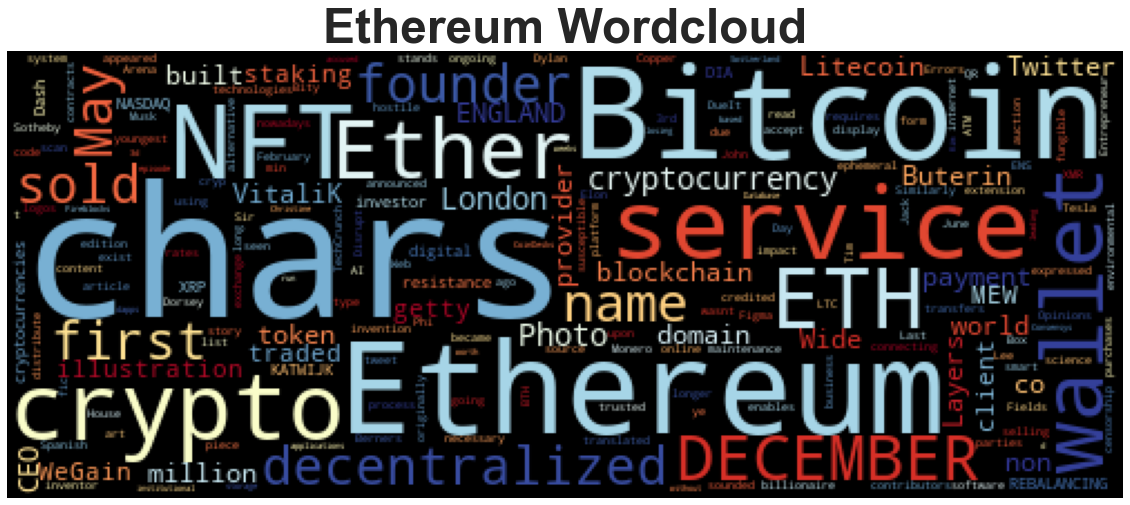

In [24]:
# Generate the Ethereum word cloud
wordcloud(eth_df.Text.str.cat(), title="Ethereum Wordcloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together

article_btc = btc_df.Text.str.cat()
print(article_btc)

It's all about clean energy, it seems. 
Elon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoi… [+2508 chars]Several crypto fans that descended on Miami, Florida, last weekend for the largest bitcoin conference in history are now saying theyve tested positive for covid-19. 
Larry Cermak, research director … [+2389 chars]El Salvador has become the first country in the world to recognize the cryptocurrency bitcoin as legal currency, according to President Nayib Bukele in a tweet on Wednesday. Citizens will be able to … [+3840 chars]By Reuters Staff
June 13 (Reuters) - Tesla Incs Elon Musk tweeted on Sunday that the company will resume allowing bitcoin transactions when there is confirmation of reasonable clean energy usage by … [+288 chars]Bitcoin hit a two-week peak just shy of $40,000 on Monday, after another weekend reacting to tweets from Tesla boss Elon Musk, who fended off critic

In [29]:
# Run the NER processor on all of the text
doc = nlp(article_btc)

# Add a title to the document

doc.user_data["title"] = "Bitcoin NER"

In [30]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)


In [31]:
# List all Entities

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
article_eth = eth_df.Text.str.cat()
print(article_eth)

This article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.
Last May, VitaliK Buterin became the youngest billionaire in the world at just 27 ye… [+2422 chars]Sir Tim Berners-Lee, credited as the inventor of the World Wide Web, is selling the source code for his invention as an NFT at a Sotheby's auction. 
The NFT, or non-fungible token, is a type of cryp… [+2698 chars]ENS stands for Ethereum Name Service and it is a decentralized domain name system built on the Ethereum blockchain. You can get domains with the .eth extension by going here, connecting a wallet, and… [+1098 chars]In February 2021, Figma CEO Dylan Fields sold a piece of NFT art for $7.5 million. Similarly, Twitter co-founder Jack Dorsey sold his first tweet on Twitter as an NFT for $2,915,835.47.
An NFT (non-… [+24897 chars]Opinions expressed by Entrepreneur contributors are their own.
On May 12, 2021, Elon Musk announced that Tesla would no longer accept Bitcoin as a

In [33]:
# Run the NER processor on all of the text

doc_eth = nlp(article_eth)

# Add a title to the document

doc_eth.user_data["title"] = "Ethereum NER"


In [34]:
# Render the visualization
displacy.render(doc_eth, style='ent', jupyter=True)


In [35]:
# List all Entities

---